### Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.


Dataset Description

employee_id	Unique ID for employee
department	Department of employee
region	Region of employment (unordered)
education	Education Level
gender	Gender of Employee
recruitment_channel	Channel of recruitment for employee
no_of_trainings	no of other trainings completed in previous year on soft skills, technical skills etc.
age	Age of Employee
previous_year_rating	Employee Rating for the previous year
length_of_service	Length of service in years
KPIs_met >80%	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
awards_won?	if awards won during previous year then 1 else 0
avg_training_score	Average score in current training evaluations
is_promoted	(Target) Recommended for promotion


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("test_2umaH9m.csv")

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
train.shape

(23490, 13)

In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [6]:
train = train.dropna()

In [7]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [8]:
# target = train.is_promoted

In [9]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [10]:
# train_treated
# numerical = train.select_dtypes(include = np.number)
# nonnumerical = train.select_dtypes(exclude = np.number)

In [11]:
# numerical.head()

#### Feature Exploration

In [12]:
# train.is_promoted.value_counts().sort_index()

In [13]:
# # plt.figure(figsize=(12,12))
# sns.boxplot(train.is_promoted)

In [14]:
train.no_of_trainings.value_counts().sort_index()

1    16790
2     3165
3      639
4      161
5       33
6       19
7        8
8        2
9        2
Name: no_of_trainings, dtype: int64

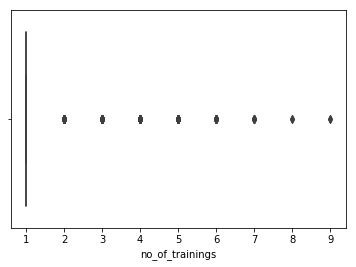

In [15]:
sns.boxplot(train.no_of_trainings)

In [16]:
train.age.value_counts().sort_index() 

20      22
21      13
22      26
23      78
24     152
25     347
26     608
27     869
28    1028
29    1142
30    1412
31    1399
32    1405
33    1334
34    1270
35    1140
36    1004
37     882
38     844
39     729
40     652
41     565
42     465
43     426
44     348
45     296
46     273
47     251
48     215
49     204
50     197
51     157
52     167
53     150
54     134
55     134
56     115
57      95
58     101
59      82
60      88
Name: age, dtype: int64

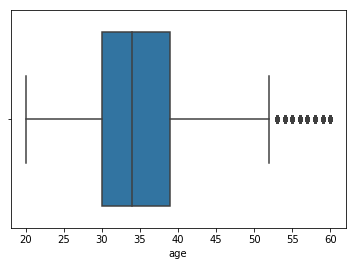

In [17]:
sns.boxplot(train.age)

In [18]:
# numerical.columns

In [19]:
train.previous_year_rating.value_counts().sort_index()

1.0    2541
2.0    1658
3.0    7565
4.0    4115
5.0    4940
Name: previous_year_rating, dtype: int64

In [20]:
train.length_of_service.value_counts().sort_index()

1      157
2     2657
3     2901
4     2806
5     2497
6     1964
7     2265
8     1234
9     1038
10     918
11     345
12     320
13     265
14     255
15     233
16     210
17     201
18     161
19     139
20      59
21      29
22      27
23      28
24      18
25      23
26      14
27      16
28      12
29      10
30       6
31       7
32       1
33       1
34       2
Name: length_of_service, dtype: int64

In [21]:
train["KPIs_met >80%"].value_counts().sort_index()

0    13274
1     7545
Name: KPIs_met >80%, dtype: int64

In [22]:
train["awards_won?"].value_counts().sort_index()

0    20333
1      486
Name: awards_won?, dtype: int64

In [23]:
train["avg_training_score"].value_counts().sort_index()

39       1
40       2
41       7
42      12
43      58
44     139
45     269
46     445
47     677
48     892
49     961
50    1039
51     878
52     673
53     483
54     371
55     348
56     353
57     579
58     732
59     815
60     817
61     692
62     577
63     399
64     305
65     223
66     204
67     284
68     329
      ... 
70     457
71     379
72     279
73     226
74     159
75     160
76     199
77     276
78     360
79     415
80     497
81     517
82     479
83     475
84     470
85     369
86     330
87     248
88     152
89     119
90      67
91      43
92      32
93      23
94      29
95      20
96      23
97      21
98      14
99      11
Name: avg_training_score, Length: 61, dtype: int64

In [24]:
# numerical.columns

'employee_id'- drop
'no_of_trainings'-bin
'age'-bin
'previous_year_rating'- contains null (drop null)
'length_of_service'- possible binning
'KPIs_met >80%'
'awards_won?'
'avg_training_score'
'is_promoted'- imbalanced - resampling

### Working on Numerical Features

In [25]:
# numerical.isna().sum()

In [26]:
# numerical_treated = numerical.copy(deep=True)

In [27]:
# numerical_treated = numerical.dropna()

In [28]:
# numerical_treated.isna().sum()

In [29]:
# numerical_treated = numerical_treated.drop(columns=["employee_id"])
# train_treated = train.drop(columns=["employee_id"])
train_treated = train.copy(deep=True)

In [30]:
def age(df):
    df.loc[df['age'] <= 28, 'age'] = 1
    df.loc[(df['age'] > 28) & (df['age'] <= 36), 'age'] = 2
    df.loc[(df['age'] > 36) & (df['age'] <= 44), 'age'] = 3
    df.loc[(df['age'] > 44) & (df['age'] <= 52), 'age'] = 4
    df.loc[(df['age'] > 52) & (df['age'] <= 60), 'age'] = 5    
        
    return df

In [31]:
age(train_treated)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
1,74430,HR,region_4,Bachelor's,f,other,1,2,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,2,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,2,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,2,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,2,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,2,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,2,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,4,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,2,5.0,2,1,0,76
10,60245,Sales & Marketing,region_16,Bachelor's,m,sourcing,2,3,5.0,12,1,0,50


In [32]:
def no_of_trainings(df):
    df.loc[df['no_of_trainings'] <= 1, 'no_of_trainings'] = 1
    df.loc[(df['no_of_trainings'] > 1) & (df['no_of_trainings'] <= 5), 'no_of_trainings'] = 2
    df.loc[(df['no_of_trainings'] > 5) & (df['no_of_trainings'] <= 10), 'no_of_trainings'] = 3
    
    return df

In [33]:
no_of_trainings(train_treated)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
1,74430,HR,region_4,Bachelor's,f,other,1,2,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,2,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,2,2,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,2,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,2,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,2,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,2,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,4,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,2,5.0,2,1,0,76
10,60245,Sales & Marketing,region_16,Bachelor's,m,sourcing,2,3,5.0,12,1,0,50


#### Store Target

In [34]:
# target = train.is_promoted

###  Nonnumerical Analyses

In [35]:
# nonnumerical.columns

In [36]:
# nonnumerical.isna().sum()

In [37]:
# nonnumerical_treated = nonnumerical.dropna()

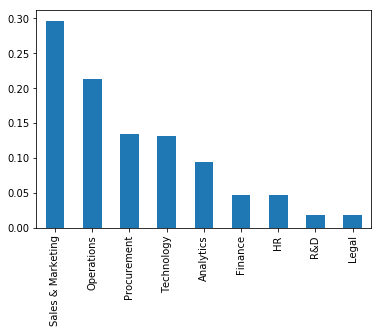

In [38]:
train_treated["department"].value_counts(normalize=True).plot.bar()
plt.show()

In [39]:
train_treated["department"].value_counts()

Sales & Marketing    6176
Operations           4434
Procurement          2804
Technology           2725
Analytics            1960
Finance               974
HR                    972
R&D                   391
Legal                 383
Name: department, dtype: int64

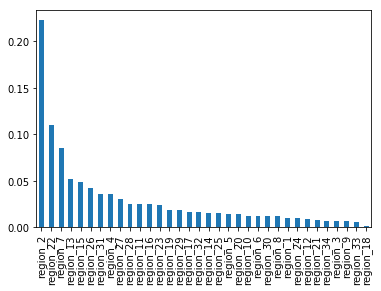

In [40]:
train_treated["region"].value_counts(normalize=True).plot.bar()
plt.show()

In [41]:
train_treated["region"].value_counts().sort_index()

region_1      208
region_10     259
region_11     523
region_12     186
region_13    1084
region_14     325
region_15    1011
region_16     522
region_17     335
region_18      16
region_19     391
region_2     4636
region_20     296
region_21     154
region_22    2298
region_23     488
region_24     200
region_25     308
region_26     881
region_27     624
region_28     530
region_29     377
region_3      135
region_30     243
region_31     749
region_32     333
region_33     120
region_34     139
region_4      740
region_5      305
region_6      257
region_7     1771
region_8      242
region_9      133
Name: region, dtype: int64

In [42]:
train_treated["education"].value_counts()

Bachelor's          14167
Master's & above     6431
Below Secondary       221
Name: education, dtype: int64

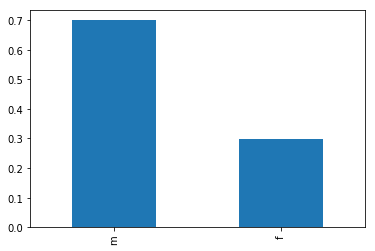

In [43]:
train_treated["gender"].value_counts(normalize=True).plot.bar()
plt.show()

In [44]:
train_treated["gender"].value_counts()

m    14585
f     6234
Name: gender, dtype: int64

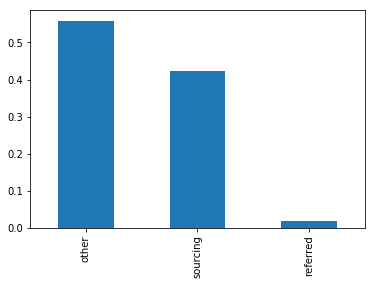

In [45]:
train_treated["recruitment_channel"].value_counts(normalize=True).plot.bar()
plt.show()

In [46]:
train_treated["recruitment_channel"].value_counts()

other       11620
sourcing     8793
referred      406
Name: recruitment_channel, dtype: int64

### Scaling Numericals

In [47]:
# train_treated
numerical_treated = train_treated.select_dtypes(include = np.number)

In [48]:
cols = numerical_treated.drop(columns=["employee_id","age","no_of_trainings"]).columns

In [49]:
# cols = numerical_treated.columns 

In [50]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_scaling="True")
## df_r stores the robust scaled data

df_r = scaler.fit_transform(numerical_treated.drop(columns=["employee_id","age","no_of_trainings"]))

df_r = pd.DataFrame(df_r, columns=cols)

df_r.head()

,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,0.0,0.0,0.0,-0.375000
1,-2.0,-0.2,0.0,0.0,-0.541667
2,-1.0,0.8,0.0,0.0,0.208333
3,1.0,0.4,0.0,0.0,0.041667
4,0.0,-0.6,0.0,0.0,0.333333


In [51]:
df_r= pd.concat([df_r,train_treated[["employee_id","age","no_of_trainings"]]],axis=1)

In [52]:
# binned_num = numerical_treated[["age","no_of_trainings"]]

In [53]:
# df_r = pd.concat([df_r,binned_num],axis=1)

### Encoding Nonnumericals

In [54]:
nonnumerical_treated = train_treated.select_dtypes(exclude = np.number)

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# nonnumerical_treated_1 = nonnumerical_treated.copy(deep=True)

## LabelEncoding 

for x in list(nonnumerical_treated.iloc[:,:]):
    nonnumerical_treated[x] = le.fit_transform(nonnumerical_treated[x])

## Encoded categoricals
    
nonnumerical_treated

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,department,region,education,gender,recruitment_channel
1,2,28,0,0,0
2,7,4,0,1,0
3,5,11,0,0,0
4,1,21,0,1,2
5,5,31,0,1,2
6,1,11,0,1,0
7,0,14,0,1,2
8,8,31,2,1,0
9,8,14,0,1,2
10,7,7,0,1,2


#### Concat

In [56]:
# stop

In [57]:
df_treated = pd.concat([df_r, nonnumerical_treated], axis=1)

In [58]:
# df_treated

In [59]:
df_treated.shape

(23203, 13)

In [60]:
df_treated_dropped_na = df_treated.dropna()

In [61]:
# df_treated_dropped_na

In [62]:
df_treated.isna().sum()

previous_year_rating    2384
length_of_service       2384
KPIs_met >80%           2384
awards_won?             2384
avg_training_score      2384
employee_id             2384
age                     2384
no_of_trainings         2384
department              2384
region                  2384
education               2384
gender                  2384
recruitment_channel     2384
dtype: int64

In [63]:
sub= pd.DataFrame()
sub["employee-id"]=df_treated_dropped_na.employee_id

In [64]:
df_treated_dropped_na.isna().sum()

previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
employee_id             0
age                     0
no_of_trainings         0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
dtype: int64

In [65]:
df_treated_dropped_na.shape

(18435, 13)

In [66]:
----stop

NameError: name 'stop' is not defined

In [ ]:
# df_treated.shape

In [ ]:
# target.dropna().shape

#### Majority Minority Split

In [ ]:
df_minority = df_final[df_final["is_promoted"]==1]
df_majority = df_final[df_final["is_promoted"]==0]

In [ ]:
df_majority.shape,df_minority.shape

#### Resampling

In [ ]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True,n_samples= int(4232*2), random_state=123) 

## new minority shape

df_minority_upsampled.shape

In [ ]:
## concatenating new minority and majority

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_upsampled=df_upsampled.dropna()

In [ ]:
# target

In [67]:
import pickle

In [68]:
filename= "final.pkl"
loaded_model = pickle.load(open(filename, 'rb'))

In [69]:
result = loaded_model.predict(df_treated_dropped_na.drop(columns=["employee_id"]))

In [ ]:
sub = pd.DataFrame()

In [ ]:
sub["employee_id"]=train.employee_id

In [70]:
sub["is_promoted"]= result

In [73]:
sub.is_promoted.value_counts()

0.0    18344
1.0       91
Name: is_promoted, dtype: int64

In [79]:
sub.to_csv("submission1.csv",index=False)

In [78]:
sub.isna().sum()

employee-id    0
is_promoted    0
dtype: int64

In [93]:
sub.to_csv("submission.csv",index=False)

In [89]:
sub.iloc[0,0]

74430.0

In [92]:
sub = sub.set_index("employee-id")

In [94]:
sub

,is_promoted
employee-id,
74430.0,0.0
72255.0,0.0
38562.0,0.0
64486.0,0.0
46232.0,0.0
54542.0,0.0
67269.0,0.0
66174.0,0.0
76303.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(df.drop("is_promoted", axis = 1), df_upsampled.is_promoted, test_size = 0.2, random_state = 42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## LogReg

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log= LogisticRegression(class_weight="balanced",random_state=42)

In [ ]:
log.fit(X_train,y_train)
ypred_log=log.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, ypred_log))
print(accuracy_score(y_test, ypred_log))

In [ ]:
## f1 being the harmonic mean of PR is the preferred metric 

from sklearn.metrics import f1_score

f1_score(y_test,ypred_log)

## DTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight="balanced")
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_score(y_test, y_pred_dtc)

In [ ]:
dtc_cv = (cross_val_score(dtc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

dtc_cv

In [ ]:
f1_score(y_test,y_pred_dtc)

In [ ]:
print(classification_report(y_test, y_pred_dtc))
print(accuracy_score(y_test, y_pred_dtc))


In [ ]:
coef = pd.Series(dtc.feature_importances_,df_upsampled.drop('is_promoted', axis = 1).columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

In [ ]:

## cross validating(k/10 folds) with rfc and obtaining the mean subsequently

cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy')

rfc_cv = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

rfc_cv

In [ ]:
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

f1_score(y_test,y_pred_rf)

In [ ]:
coef = pd.Series(rfc.feature_importances_,df_upsampled.drop('is_promoted', axis = 1).columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

In [ ]:
# #
# X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_upsampled.drop(columns=["is_promoted","awards_won?"], axis = 1), df_upsampled.is_promoted, test_size = 0.2, random_state = 42)
# k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
# rfc_new = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)
# rfc_new.fit(X_train_new, y_train_new)
# y_pred_rf_new = rfc_new.predict(X_test_new)

# cross_val_score(rfc_new, X_train_new, y_train_new, cv=k_fold, n_jobs=2, scoring = 'accuracy')

In [ ]:
# f1_score(y_test_new,y_pred_rf_new)

In [ ]:
import pickle

filename= "final_model_ab_unscaled.pkl"
pickle.dump(ab, open(filename, 'wb'))